# Developer Tools / Laplacian Spectra

In [1]:
%matplotlib inline
from lrgsglib.core import *

In [2]:
move_to_rootf()
#
plt.style.use('ipynb/nb_plotsheet.mplstyle')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


## Miscellanea

### Single errors eigenvector

In [4]:
sizes = 2**np.arange(3, 5)
verbose = False
#
gcIterProd = product(['squared', 'tri', 'hex'], 
                     ['single', 'singleZERR', 'singleXERR'])
for geometry, cell in gcIterProd:
        conditional_print(f"{geometry}, {cell}...\n\t", verbose, end=' ')
        lattices = {}
        #
        for side in sizes:
            lattices[side] = Lattice2D(#
                side1 = side,
                geo = geometry,
                init_nw_dict = True,
                sgpath='test_data', 
            )
            lattices[side].flip_sel_edges(
                lattices[side].nwDict[cell]['G']
            )
        #
        eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
        #
        if os.path.exists(eigvpath):
            conditional_print("File already exists.", verbose)
            continue
        else:
            conditional_print("computing... ", verbose)
            lattices[side].compute_k_eigvV()
            with open(eigvpath, 'wb') as f:
                np.save(f, np.abs(lattices[side].eigV))
            conditional_print("done.", verbose)

### No flip Signed Laplacian eigenvectors of a Squared Lattice

In [4]:
side = 50
geo = 'squared'
pbc = True
Neigv = 10
selEigv = 0
pflip = 0.08

In [5]:
l = Lattice2D(side, geo=geo, pbc=pbc, pflip=pflip)
l.flip_random_fract_edges()
l.compute_k_eigvV(howmany=Neigv)
eigV = np.sign(l.eigV).reshape(Neigv, side, side)

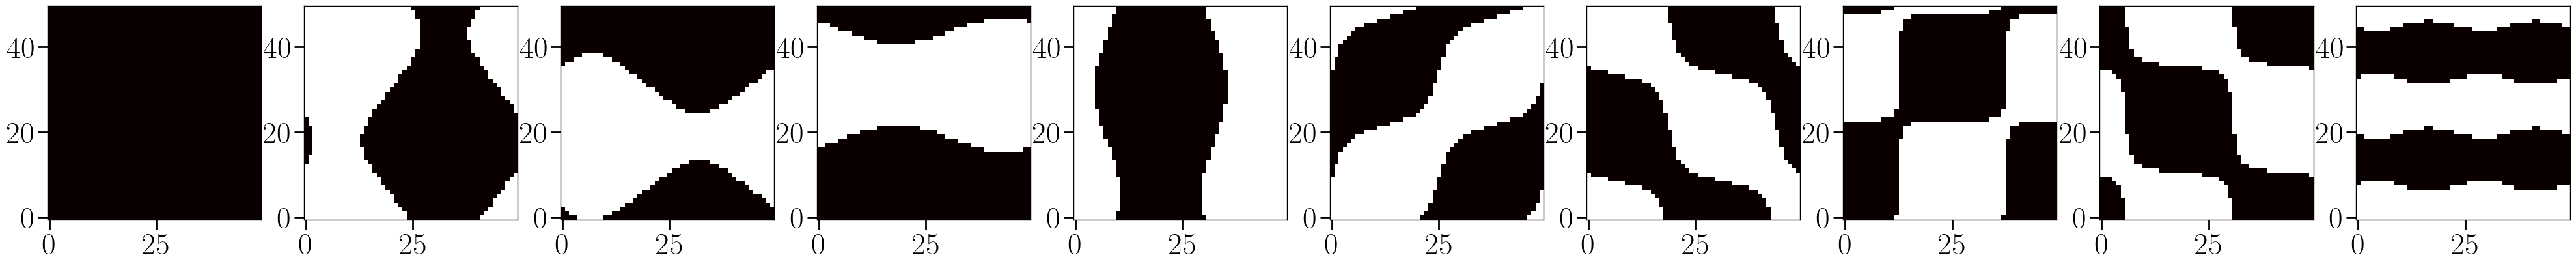

In [6]:
fig, ax = plt.subplots(ncols=Neigv, figsize=(Neigv*5, 5))
for i,axi in enumerate(ax):
    axi.imshow(eigV[i], cmap='hot', interpolation=None)